In [10]:
import pandas as pd
results = pd.read_csv("data/results.csv")

In [11]:
results

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
0,M,10000M Men,Rio,2016,G,Mohamed FARAH,USA,25:05.17
1,M,10000M Men,Rio,2016,S,Paul Kipngetich TANUI,KEN,27:05.64
2,M,10000M Men,Rio,2016,B,Tamirat TOLA,ETH,27:06.26
3,M,10000M Men,Beijing,2008,G,Kenenisa BEKELE,ETH,27:01.17
4,M,10000M Men,Beijing,2008,S,Sileshi SIHINE,ETH,27:02.77
...,...,...,...,...,...,...,...,...
2389,W,Triple Jump Women,Athens,2004,S,Hrysopiyi DEVETZI,GRE,15.25
2390,W,Triple Jump Women,Athens,2004,B,Tatyana LEBEDEVA,RUS,15.14
2391,W,Triple Jump Women,Atlanta,1996,G,Inessa KRAVETS,UKR,15.33
2392,W,Triple Jump Women,Atlanta,1996,S,Inna LASOVSKAYA,RUS,14.98


In [12]:
results.head()

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
0,M,10000M Men,Rio,2016,G,Mohamed FARAH,USA,25:05.17
1,M,10000M Men,Rio,2016,S,Paul Kipngetich TANUI,KEN,27:05.64
2,M,10000M Men,Rio,2016,B,Tamirat TOLA,ETH,27:06.26
3,M,10000M Men,Beijing,2008,G,Kenenisa BEKELE,ETH,27:01.17
4,M,10000M Men,Beijing,2008,S,Sileshi SIHINE,ETH,27:02.77


In [13]:
results.columns
#Split up in legends by medals and event

Index(['Gender', 'Event', 'Location', 'Year', 'Medal', 'Name', 'Nationality',
       'Result'],
      dtype='object')

In [27]:
#results.loc[results['Event'] == "100M Men"]
results['Location'].unique()

array(['Rio', 'Beijing', 'Sydney', 'Barcelona', 'Los Angeles', 'Montreal',
       'Mexico', 'Rome', 'Helsinki', 'Berlin', 'Amsterdam', 'Antwerp',
       'London', 'Athens', 'Atlanta', 'Moscow', 'Munich', 'Tokyo',
       'Melbourne / Stockholm', 'Paris', 'Stockholm', 'St Louis', 'Seoul'],
      dtype=object)

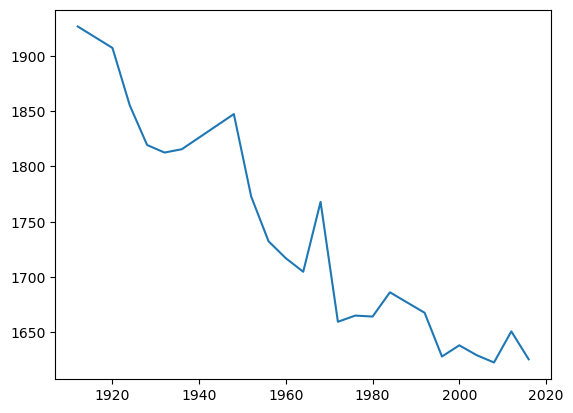

In [7]:
#athlete_events = pd.read_csv("data/athlete_events.csv")
df = df[(df["Event"] == "10000M Men") & (df["Medal"] == "S")].sort_values(by="Year")
plt.plot(df['Year'], df['Result_seconds'])

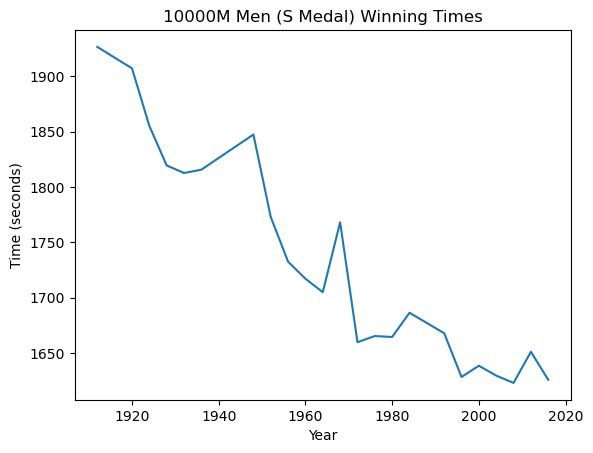

Forecasted Winning Times (in seconds):
23    1629.366384
24    1628.490646
25    1628.888997
Name: predicted_mean, dtype: float64


/Users/avaduggan/miniconda3/envs/ds/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/avaduggan/miniconda3/envs/ds/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/avaduggan/miniconda3/envs/ds/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/avaduggan/miniconda3/envs/ds/lib/python3.9/site-packages/statsmodels/tsa/state

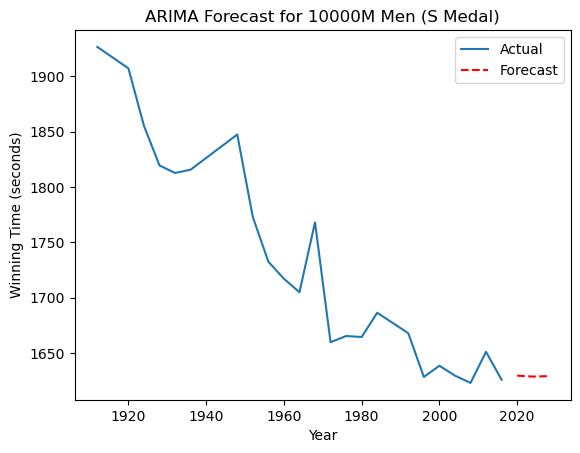

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv("data/results.csv")

# Function to convert time results into seconds 
def time_to_seconds(time_str):
    try:
        parts = time_str.split(":")
        if len(parts) == 3:  # HH:MM:SS format
            return int(parts[0]) * 3600 + int(parts[1]) * 60 + float(parts[2])
        elif len(parts) == 2:  # MM:SS format
            return int(parts[0]) * 60 + float(parts[1])
        else:
            return np.nan  # Handle unexpected format
    except:
        return np.nan


df["Result_seconds"] = df["Result"].astype(str).apply(time_to_seconds)

# drop rows where conversion failed
df = df.dropna(subset=["Result_seconds"])

# Filter for a specific event and medal type
event = "10000M Men"
medal_type = "S"
df_filtered = df[(df["Event"] == event) & (df["Medal"] == medal_type)]

#data is sorted by year
df_filtered = df_filtered.sort_values(by="Year")

df_filtered.set_index("Year", inplace=True)
df_filtered["Result_seconds"].plot(title=f"{event} ({medal_type} Medal) Winning Times", ylabel="Time (seconds)", xlabel="Year")
plt.show()

# ARIMA model fitting
order = (2, 1, 2)  # This can be tuned based on AIC/BIC scores
model = ARIMA(df_filtered["Result_seconds"], order=order)
model_fit = model.fit()


forecast_steps = 3  # Predict for the next 3 Olympics (12 years ahead)
forecast = model_fit.forecast(steps=forecast_steps)


print("Forecasted Winning Times (in seconds):")
print(forecast)

years_future = list(range(df_filtered.index.max() + 4, df_filtered.index.max() + 4 * (forecast_steps + 1), 4))
plt.plot(df_filtered.index, df_filtered["Result_seconds"], label="Actual")
plt.plot(years_future, forecast, label="Forecast", linestyle="dashed", color="red")
plt.legend()
plt.title(f"ARIMA Forecast for {event} ({medal_type} Medal)")
plt.xlabel("Year")
plt.ylabel("Winning Time (seconds)")
plt.show()
